<a href="https://colab.research.google.com/github/MADHKOUR-Khalil/Prediction-de-localisation-par-le-temps/blob/main/localisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mohamed Khalil MADHKOUR | DSEN-A**




**Sujet:** Prediction de localisation par le temps (jour, mois et année )

**Note:** Donnees collecter par Facebook

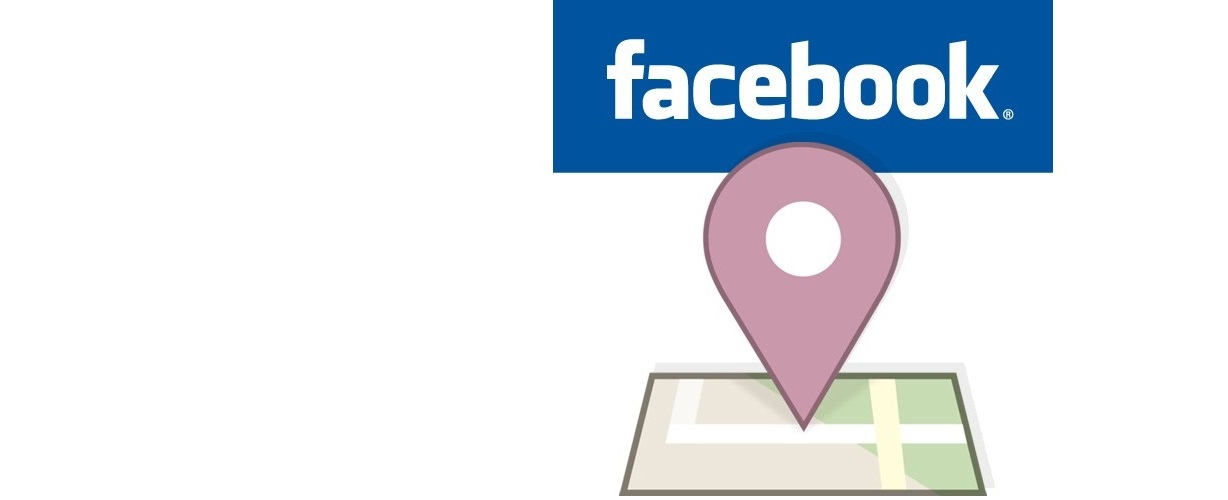

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/location_history')

Mounted at /content/drive


# Preparation des donnes

---




Importaion des bibliteque naisiaire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import datetime as datetime
import time as time
import folium
import sklearn.metrics as metrics


Source de fichier

Importation de fichier

In [ ]:
df=pd.read_csv("location_history_Khalil.csv")
df.columns = ['name', 'lat','lon','ts']
print(df)

           name        lat        lon          ts
0    La Manouba  36.807468  10.089336  1586799448
1    La Manouba  36.807468  10.089382  1586784626
2    La Manouba  36.807465  10.089376  1586617046
3    La Manouba  36.807476  10.089349  1586541136
4    La Manouba  36.807564  10.089303  1586531687
..          ...        ...        ...         ...
547       BÃ©ja  36.725110   9.189040  1511422441
548   Mornaghia  36.706380   9.961700  1511160657
549    Le Bardo  36.802920  10.120440  1511158856
550  La Manouba  36.810180  10.090000  1511158003
551   DjedeÃ¯da  36.824630   9.958910  1511036981

[552 rows x 4 columns]


Convertir du timestamp en date

In [ ]:
df['day']=""
df['month']=""
df['year']=""
df['date']=""
df['time']=""

for i in range(df['date'].count()):
  
  ts=time.ctime(df['ts'][i])
  df['day'][i]=ts.split()[0]
  df['month'][i]=ts.split()[1]
  df['time'][i]=ts.split()[3]
  df['year'][i]=ts.split()[4]
  df['date'][i]=ts.split()[1]+" "+ts.split()[2]+" "+ts.split()[4]

print(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


           name        lat        lon  ...  year         date      time
0    La Manouba  36.807468  10.089336  ...  2020  Apr 13 2020  17:37:28
1    La Manouba  36.807468  10.089382  ...  2020  Apr 13 2020  13:30:26
2    La Manouba  36.807465  10.089376  ...  2020  Apr 11 2020  14:57:26
3    La Manouba  36.807476  10.089349  ...  2020  Apr 10 2020  17:52:16
4    La Manouba  36.807564  10.089303  ...  2020  Apr 10 2020  15:14:47
..          ...        ...        ...  ...   ...          ...       ...
547       BÃ©ja  36.725110   9.189040  ...  2017  Nov 23 2017  07:34:01
548   Mornaghia  36.706380   9.961700  ...  2017  Nov 20 2017  06:50:57
549    Le Bardo  36.802920  10.120440  ...  2017  Nov 20 2017  06:20:56
550  La Manouba  36.810180  10.090000  ...  2017  Nov 20 2017  06:06:43
551   DjedeÃ¯da  36.824630   9.958910  ...  2017  Nov 18 2017  20:29:41

[552 rows x 9 columns]


In [ ]:
df['heure']=""

for i in range(df['time'].count()):
  df['heure'][i]=df['time'][i].split(":")[0]
  if 7<= int(df['heure'][i]) <= 12:
    df['heure'][i]="jour am"
  elif 12 < int(df['heure'][i]) <= 18:
    df['heure'][i]="jour am"
  else:
    df['heure'][i]="nuit"    
df['heure']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/py

0      jour am
1      jour am
2      jour am
3      jour am
4      jour am
        ...   
547    jour am
548       nuit
549       nuit
550       nuit
551       nuit
Name: heure, Length: 552, dtype: object

In [ ]:
jouram=0
jourpm=0
nuit=0
for i in range(df['time'].count()):
  if df['heure'][i]=="jour am":
    jouram=jouram+1
  elif df['heure'][i]=="jour pm":
    jourpm=jourpm+1
  else:
    nuit=nuit+1
  
print(jouram)
print(jourpm)
print(nuit)

386
0
166


Visualisation

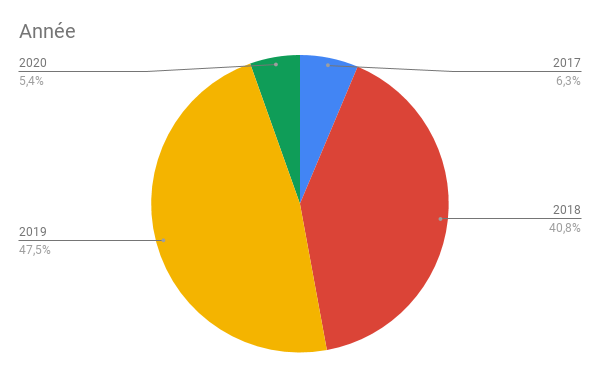

Les annne 2018 et 2019 sont dominaits

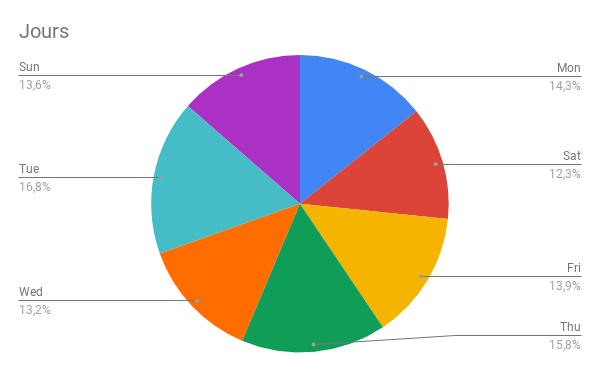




Les jours de la semaine sont équilibrés

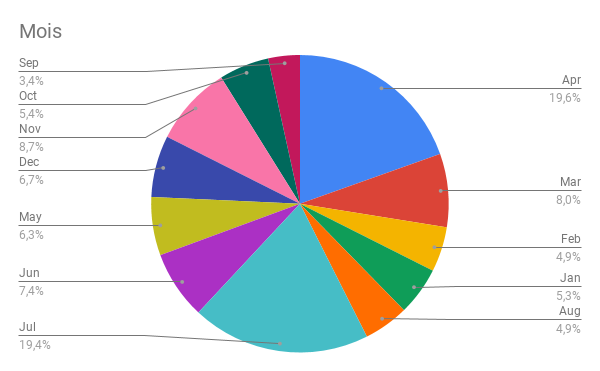

Les mois d'Avril et de Juillet sont dominaits

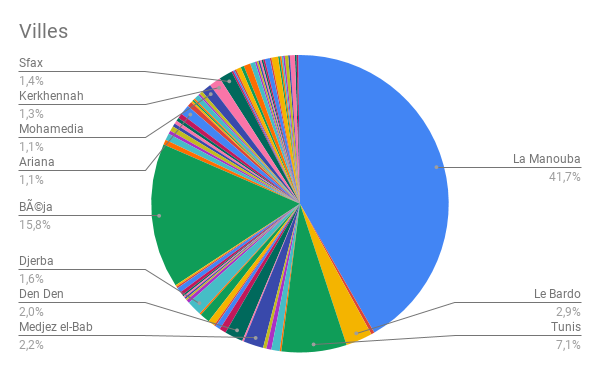

In [ ]:
b=df.groupby(['name']).count().sort_values('lat',ascending=False)["lat"].head(3)/df['date'].count()*100
print(
 b.head()   
)

name
La Manouba    41.666667
BÃ©ja         15.760870
Tunis          7.065217
Name: lat, dtype: float64


In [ ]:
top3="La Manouba BÃ©ja"
for i in range(df['date'].count()):
  if df['name'][i] not in top3:
    df['name'][i]="Autre"


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df['weekend']=""

for i in range(df['day'].count()):
  if df['day'][i]=="Sat":
    df['weekend'][i]=1
  elif df['day'][i]=="Sun":
    df['weekend'][i]=1
  else:
    df['weekend'][i]=0
df['weekend']

weekend0=0
weekend1=0

for i in range(df['weekend'].count()):
  if df['weekend'][i]==1:
    weekend1=weekend1+1
  else:
    weekend0=weekend0+1
  
print(weekend1)
print(weekend0)

143
409


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df['region']=""

for i in range(df['lat'].count()):
  if 36.66168075890534 <= df['lat'][i] <= 37.109073 and  8.479914 <= df['lon'][i] <= 9.792330786864449:
    df['region'][i]="Nord"
  elif 36.616923 <= df['lat'][i] <= 36.954895 and 9.994064 <= df['lon'][i] <= 10.400712:
    df['region'][i]="Grand Tunis"
  elif 36.193228 <= df['lat'][i] <= 37.143108 and 10.450943 <= df['lon'][i] <= 11.256539:
    df['region'][i]="Cap Bon"
  elif 35.085218 <= df['lat'][i] <= 36.032528 and 10.385664 <= df['lon'][i] <= 11.460054:
    df['region'][i]="Sahel"
  elif 32.32251888615483 <= df['lat'][i] <= 34.914521 and 9.087077462832703 <= df['lon'][i] <= 12.077940:
    df['region'][i]="Sud"
  else:
    df['region'][i]="Autre"
df[df.region=='Autre'].count()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-p

name       32
lat        32
lon        32
ts         32
day        32
month      32
year       32
date       32
time       32
heure      32
weekend    32
region     32
dtype: int64

In [ ]:
b=df.groupby(['region'])
r=b.head()
r

,name,lat,lon,ts,day,month,year,date,time,heure,weekend,region
0,La Manouba,36.807468,10.089336,1586799448,Mon,Apr,2020,Apr 13 2020,17:37:28,jour am,0,Grand Tunis
1,La Manouba,36.807468,10.089382,1586784626,Mon,Apr,2020,Apr 13 2020,13:30:26,jour am,0,Grand Tunis
2,La Manouba,36.807465,10.089376,1586617046,Sat,Apr,2020,Apr 11 2020,14:57:26,jour am,1,Grand Tunis
3,La Manouba,36.807476,10.089349,1586541136,Fri,Apr,2020,Apr 10 2020,17:52:16,jour am,0,Grand Tunis
4,La Manouba,36.807564,10.089303,1586531687,Fri,Apr,2020,Apr 10 2020,15:14:47,jour am,0,Grand Tunis
36,Autre,36.556660,10.584670,1566667204,Sat,Aug,2019,Aug 24 2019,17:20:04,jour am,1,Cap Bon
37,Autre,36.456570,10.731760,1566666284,Sat,Aug,2019,Aug 24 2019,17:04:44,jour am,1,Cap Bon
38,Autre,36.465540,10.807600,1566662244,Sat,Aug,2019,Aug 24 2019,15:57:24,jour am,1,Cap Bon
39,Autre,36.455470,10.737080,1566593036,Fri,Aug,2019,Aug 23 2019,20:43:56,nuit,0,Cap Bon
40,Autre,36.453130,10.732450,1566592297,Fri,Aug,2019,Aug 23 2019,20:31:37,nuit,0,Cap Bon


Les 4 plus villes visites sont :


1.   La Manouba 41.7%
2.   Béja 15.8%
3.   Tunis 7.1%
4.   Le Bardo 2.9%


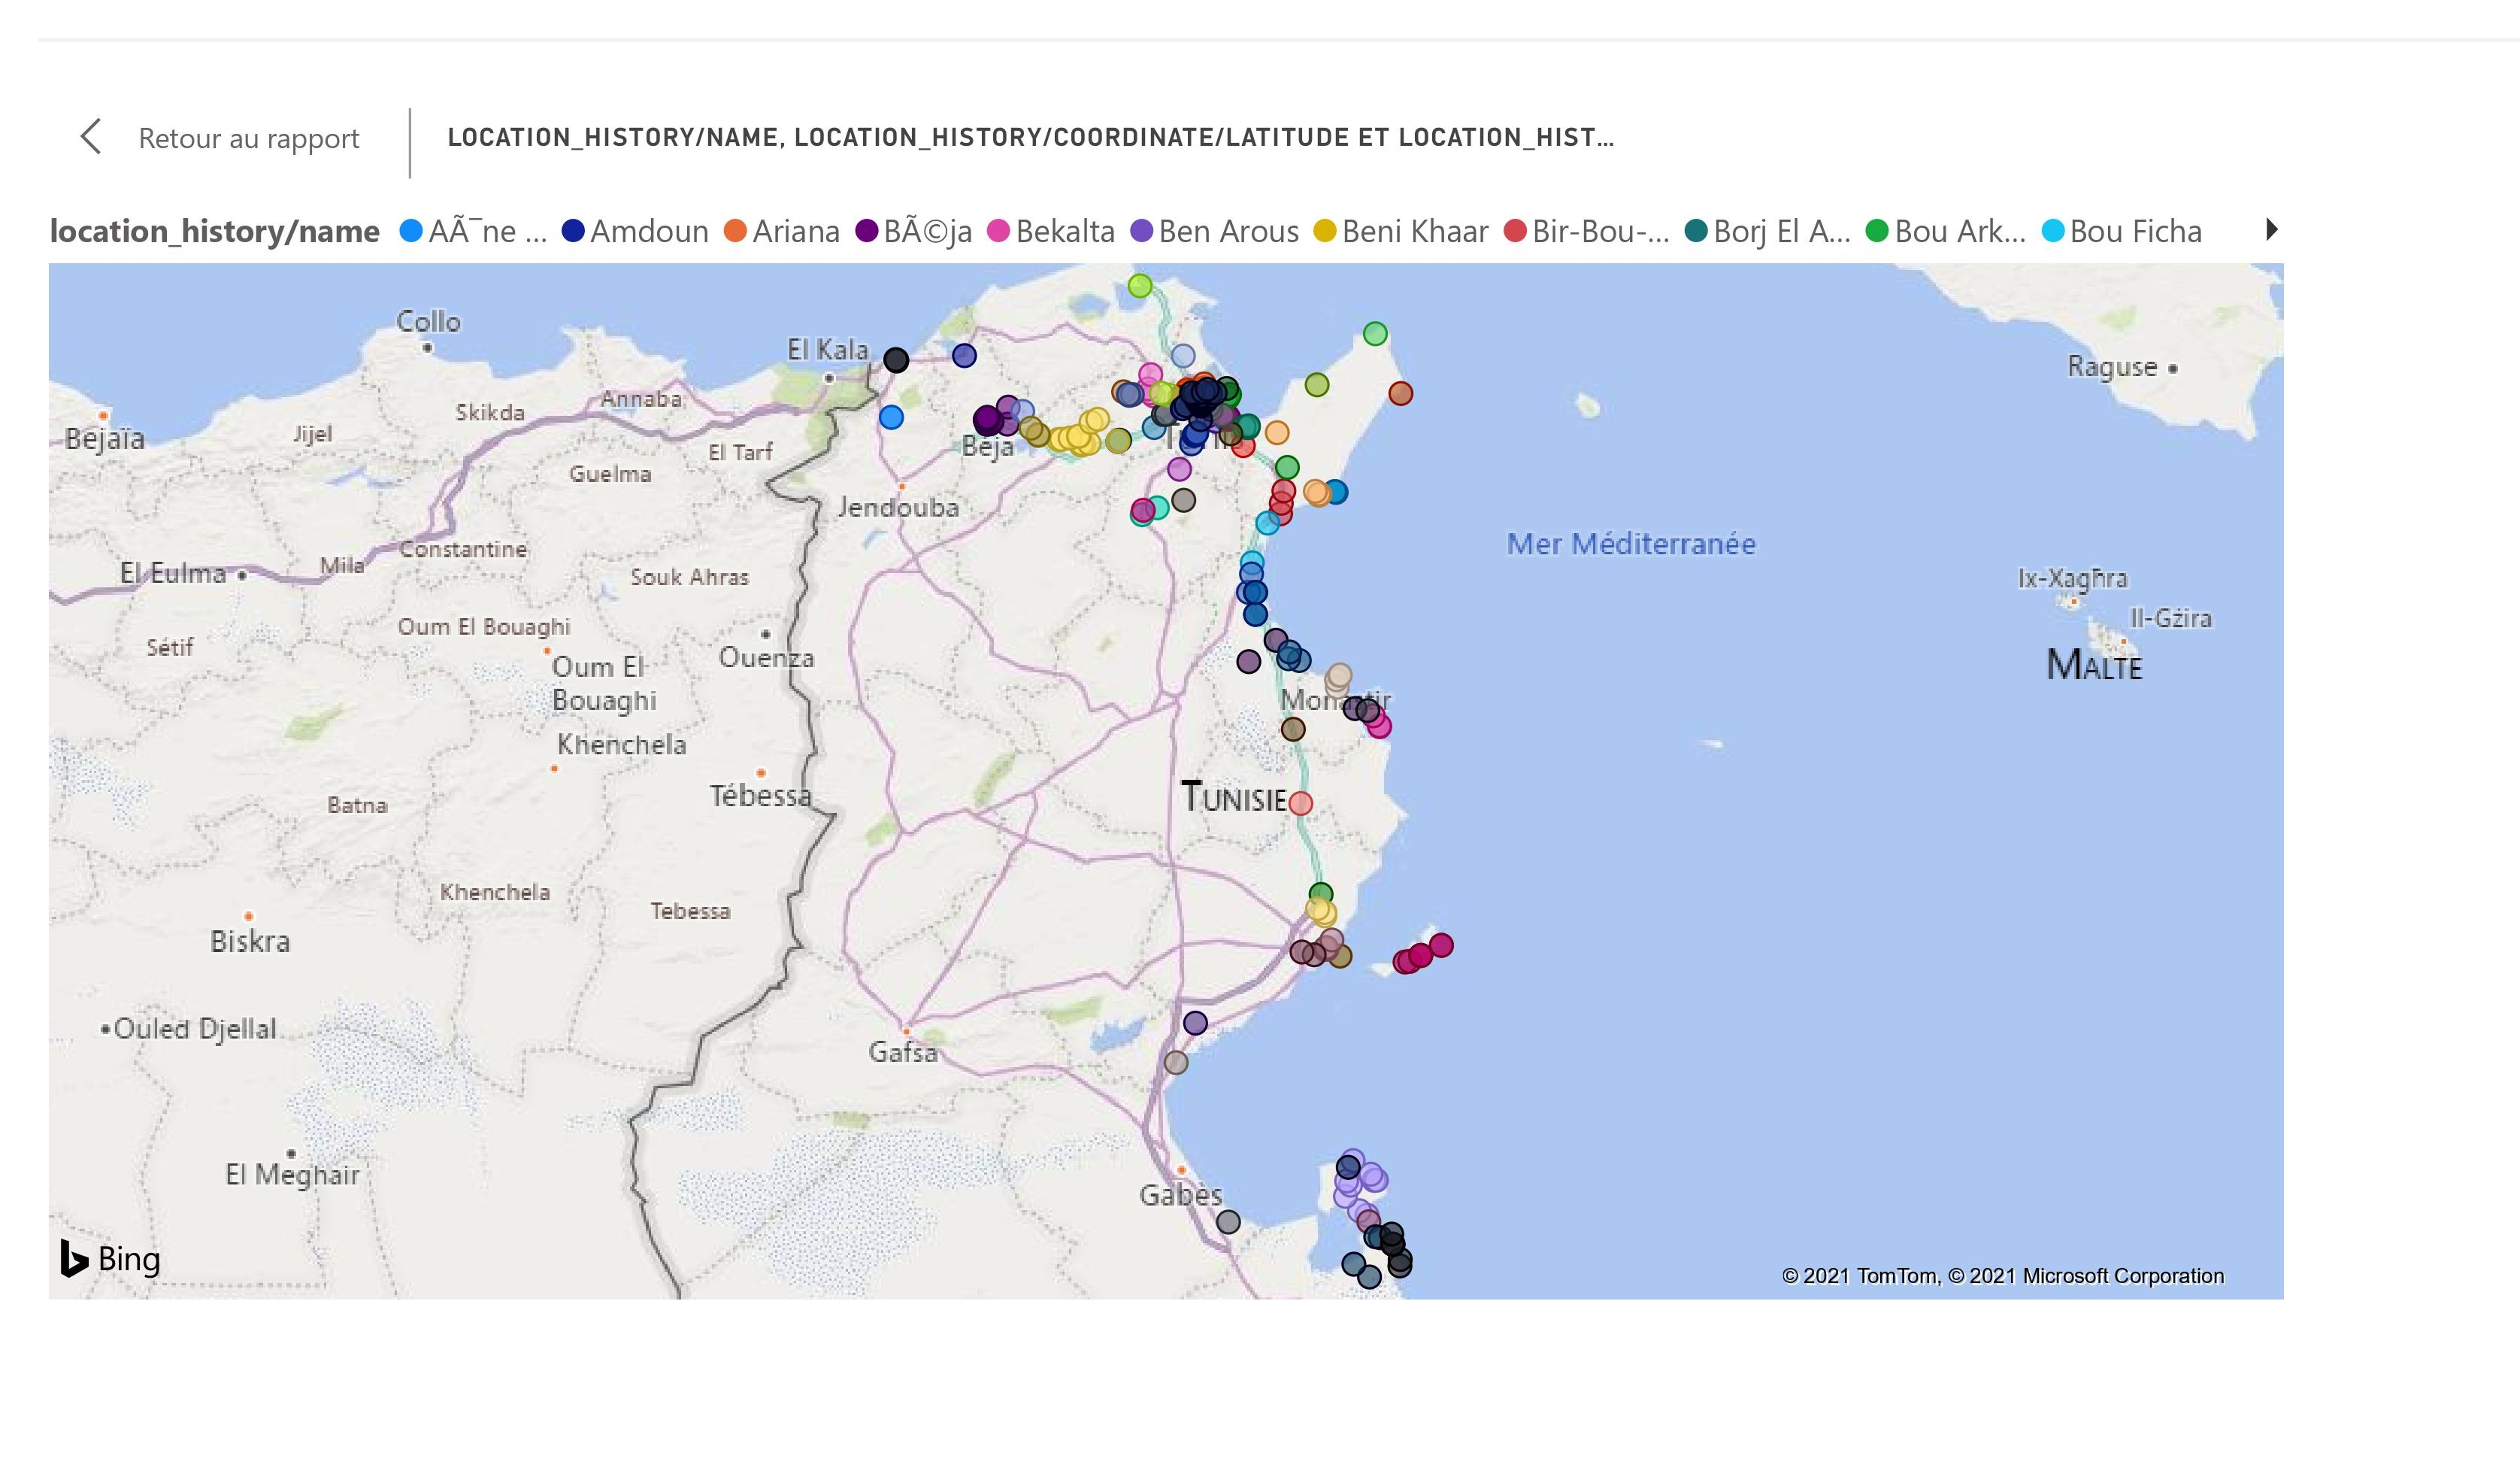

In [ ]:
map = folium.Map(location=[36.807468 , 10.089336], zoom_start=9)
 
# add marker one by one on the map
for i in range(0,len(df)):
   folium.Circle(
      location=[df["lat"][i], df["lon"][i]],
      radius=5,
 
   ).add_to(map)
 
map

exportation de fichier

In [ ]:
df.to_csv('/content/drive/My Drive/location_history/export.csv')

In [ ]:
dfwe=df[df.weekend==1]
dfwe[df.weekend !="BÃ©ja"].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


name       143
lat        143
lon        143
ts         143
day        143
month      143
year       143
date       143
time       143
heure      143
weekend    143
region     143
dtype: int64

# Choix des algorithmes


---




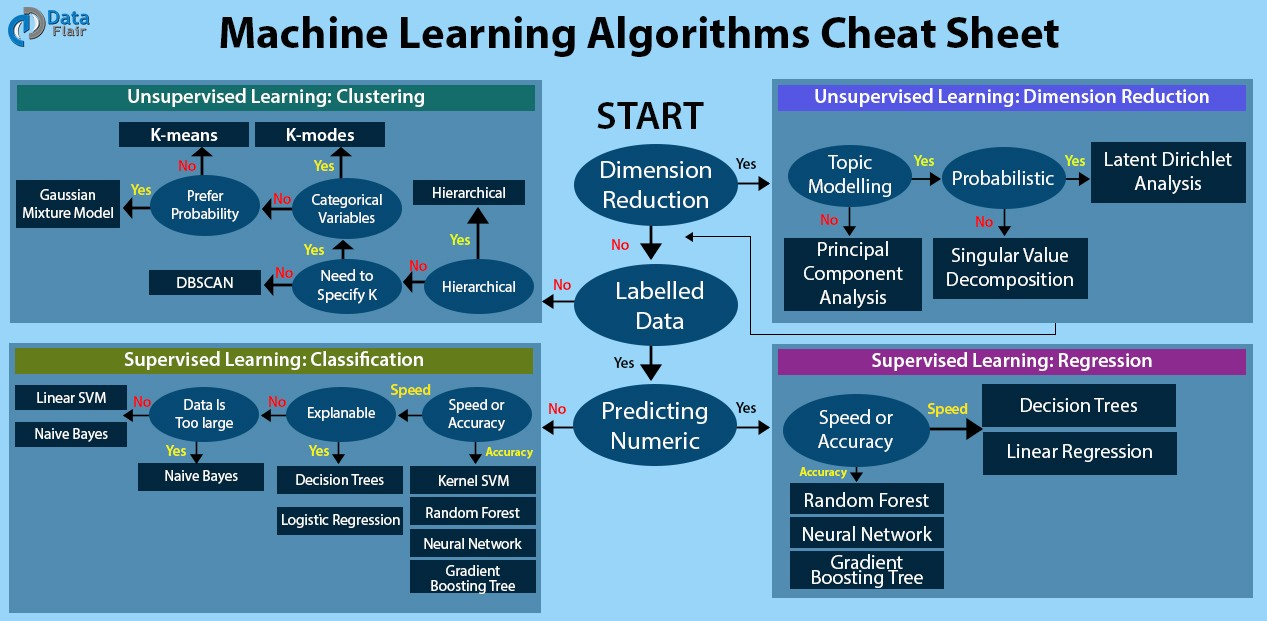



Description 
*   Données labellisées 
*   Prediction non numérique



**->** Apprentissage supervisé : ***Classification*** 



On va essayer ces trois algorithmes :
1.   Decision Tree
2.   SVM
3.   Random Forest
4.   XGBoost

In [ ]:
df.day = pd.factorize(df.day)[0]
df.month = pd.factorize(df.month)[0]
df.name = pd.factorize(df.name)[0]
df.year = pd.factorize(df.year)[0]
df.heure = pd.factorize(df.heure)[0]
df.weekend = pd.factorize(df.weekend)[0]

x = df[[ 'day','month','year','heure','weekend']]
y = df['region']

In [ ]:
df.corr()

,name,lat,lon,ts,day,month,year,heure,weekend
name,1.000000,-0.163234,-0.441799,-0.291887,0.009999,0.208052,0.305516,-0.160850,-0.086831
lat,-0.163234,1.000000,-0.563751,-0.163544,-0.088082,0.067434,0.147175,0.168069,-0.102877
lon,-0.441799,-0.563751,1.000000,0.258815,0.092010,-0.221792,-0.261958,0.027496,0.133344
ts,-0.291887,-0.163544,0.258815,1.000000,-0.004743,-0.302551,-0.934336,0.020085,0.050153
day,0.009999,-0.088082,0.092010,-0.004743,1.000000,-0.090701,-0.060657,-0.028291,0.166937
month,0.208052,0.067434,-0.221792,-0.302551,-0.090701,1.000000,0.547865,0.113831,-0.025625
year,0.305516,0.147175,-0.261958,-0.934336,-0.060657,0.547865,1.000000,0.001747,-0.057292
heure,-0.160850,0.168069,0.027496,0.020085,-0.028291,0.113831,0.001747,1.000000,0.063086
weekend,-0.086831,-0.102877,0.133344,0.050153,0.166937,-0.025625,-0.057292,0.063086,1.000000


#K-Means

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

K = df[[ 'lat','lon']]

kmeans = KMeans(n_clusters=6, random_state=0).fit(K)

KCenter =kmeans.cluster_centers_

map = folium.Map(location=[35.494354, 9.886145], zoom_start=7)
 
# add marker one by one on the map
for i in range(0,len(KCenter)):
   folium.Circle(
      location=[KCenter[i][0], KCenter[i][1]],
      radius=10000,
 
   ).add_to(map)
 
map

# Decision Tree


---


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
import sklearn.metrics as metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F-measure : ",metrics.f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

ValueError: ignored

# SVM

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F-measure : ",metrics.f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.5843373493975904
Precision Score :  0.5843373493975904
Recall Score :  0.5843373493975904
F-measure :  0.5843373493975904


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


One-vs-One


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
svc = SVC()

OvO_SVC_clf = OneVsOneClassifier(SVC())

OvO_SVC_clf.fit(X_train, y_train)

y_pred = OvO_SVC_clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F-measure : ",metrics.f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.5963855421686747
Precision Score :  0.5963855421686747
Recall Score :  0.5963855421686747
F-measure :  0.5963855421686747


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Random Forest

---




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
#clf=RandomForestClassifier(n_estimators=100)
clf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F-measure : ",metrics.f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


Accuracy: 0.755656108597285
Precision Score :  0.755656108597285
Recall Score :  0.755656108597285
F-measure :  0.755656108597285


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
from collections import Counter

Counter([type(value) for value in y_pred])
# evaluate predictions
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F-measure : ",metrics.f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))


Accuracy: 0.7927927927927928
Precision Score :  0.7927927927927928
Recall Score :  0.7927927927927928
F-measure :  0.7927927927927928


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Naive Bayes

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 


#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision Score : ",metrics.precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

print("Recall Score : ",metrics.recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("F-measure : ",metrics.f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))

Accuracy: 0.45045045045045046
Precision Score :  0.45045045045045046
Recall Score :  0.45045045045045046
F-measure :  0.45045045045045046


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
